---
**Assignment 2: Line Fitting and Alignment**


---

**Name:** Bandara D.R.K.W.M.S.D.

**Index Number:**   190071B  
**GitHub Profile:**   https://github.com/Saliya-99/In19-S4-EN2550---Fundamentals-of-Image-Processing-and-Machine-Vision/tree/master/Assignments/Assignment2

---
Question 1 
---
In here, RANSAC Algorithm is implemented as a custom function.

ThresholdDistance = 1<br>
OutlierRatio = 0.4<br>
probability = 0.99<br>
s = 3<br>  

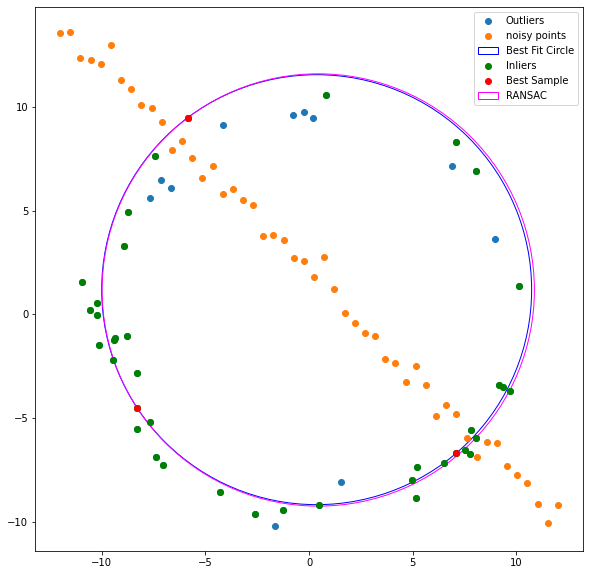

In [48]:
#Question 1
#Noisy points(given code)
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
# np . random . seed ( 0 )
#RANSAC function
def RANSAC(X_circ,ThresholdDistance,OutlierRatio,probability,s,MaxIterations):
    bestModelX = 0
    bestModelY = 0
    bestModelR = 0
    numOfInliers = 0
    samplePoint1,samplePoint2,samplePoint3 = [0,0],[0,0],[0,0]
    inliersX = []
    inliersY = []
    cenX = []
    cenY = []
    for i in range(MaxIterations):
        randInt1,randInt2,randInt3 = np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10)
        while randInt1==randInt2 or randInt2==randInt3 or randInt3==randInt1:
            randInt1,randInt2,randInt3 = np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10)
  
        x1,y1 = X_circ[randInt1,0],X_circ[randInt1,1]
        x2,y2 = X_circ[randInt2,0],X_circ[randInt2,1]
        x3,y3 = X_circ[randInt3,0],X_circ[randInt3,1]
        f = ((x1**2-x2**2+y1**2-y2**2)*(x1-x3)-(x1**2-x3**2+y1**2-y3**2)*(x1-x2))/(2*((y1-y3)*(x1-x2)-(y1-y2)*(x1-x3)))
        g = ((x1**2-x2**2+y1**2-y2**2)*(y1-y3)-(x1**2-x3**2+y1**2-y3**2)*(y1-y2))/(2*((y1-y2)*(x1-x3)-(y1-y3)*(x1-x2)))
        c = -(x1**2+y1**2+2*g*x1+2*f*y1)
        centerX = -g
        centerY = -f
        radius = (g**2+f**2-c)**(0.5)
        count = 0
        in_x = []
        in_y = []
        for j in range(len(X_circ[:,0])):
            distance_1 = abs(((X_circ[j,0]-centerX)**2+(X_circ[j,1]-centerY)**2)**(0.5)-radius)
            if distance_1<= ThresholdDistance:
                in_x.append(X_circ[j,0])
                in_y.append(X_circ[j,1])
                count+= 1
        
        if count > numOfInliers:
            bestModelX = centerX
            bestModelY = centerY
            bestModelR = radius
            numOfInliers = count
            samplePoint1[0] = x1
            samplePoint1[1] = y1
            samplePoint2[0] = x2
            samplePoint2[1] = y2
            samplePoint3[0] = x3
            samplePoint3[1] = y3
            inliersX = in_x
            inliersY = in_y
        if count/len(X_circ[:,0]) >= 1-OutlierRatio:
            cenX.append(centerX)
            cenY.append(centerY)
    return bestModelX,bestModelY,bestModelR,inliersX,inliersY,cenX,cenY,samplePoint1,samplePoint2,samplePoint3
N = 100
half_n = N // 2
r = 10
s = r /16
t = np . random . uniform (0 , 2*np . pi , half_n )
n = s*np . random . randn ( half_n )
x , y = ( r + n)*np . cos ( t ) , ( r + n)*np . sin ( t )
X_circ = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
m, b = -1, 2
x = np . linspace (-12, 12 , half_n )
y = m*x + b + s*np . random . randn ( half_n )
X_line = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
X = np . vstack ( ( X_circ , X_line ) )
figure, axes = plt.subplots(figsize = (10,10))
axes.plot(X_circ[:,0],X_circ[:,1],'o',label = 'Outliers')
axes.plot(X_line[:,0],X_line[:,1],'o',label = 'noisy points')
#////////////////////////
#Best Fit circle
#///////////////////////
ThresholdDistance = 1
OutlierRatio = 0.4
probability = 0.99
s = 3
MaxIterations = int(np.log(1-probability)/np.log(1-(1-OutlierRatio)**s))
bestModelX,bestModelY,bestModelR,inliersX,inliersY,cenX,cenY,samplePoint1,samplePoint2,samplePoint3 = RANSAC(X_circ,ThresholdDistance,
                                                                                                            OutlierRatio,probability,s,MaxIterations)
circle = plt.Circle((bestModelX,bestModelY),bestModelR,fill = False,color = 'blue',label = 'Best Fit Circle')  
axes.set_aspect( 1 )
axes.add_artist( circle )
axes.plot(inliersX,inliersY,'o',color='green',label = 'Inliers')
axes.plot(np.array([samplePoint1[0],samplePoint2[0],samplePoint3[0]]), np.array([samplePoint1[1],samplePoint2[1],samplePoint3[1]]), 'o',color='red',label = 'Best Sample')

#//////////////////////////////////
#RANSAC Circle
#/////////////////////////////////

inliersX = np.array(inliersX).reshape(len(inliersX),1)
inliersY = np.array(inliersY).reshape(len(inliersY),1)
X_Circ_ = np.concatenate((inliersX, inliersY), axis=1)
bestModelX_,bestModelY_,bestModelR_,inliersX_,inliersY_,cenX_,cenY_,samplePoint1_,samplePoint2_,samplePoint3_ = RANSAC(X_Circ_,ThresholdDistance,
                                                                                                            OutlierRatio,probability,s,MaxIterations)
circle_ = plt.Circle((bestModelX_,bestModelY_),bestModelR_,fill = False,color = 'magenta',label = 'RANSAC')  
axes.set_aspect( 1 )
axes.add_artist(circle_)
plt.legend()
plt.show()

In this question, Best fit circle is the circle which has the most number of inliers.RANSAC circle is the circle which is fitting best to those inliers. RANSAC circle is the most accurate circle for those noisy points. There is the image result of the algorithm in the above cell.

---


Question 2
---

H=  [[ 5.61796036e-02 -2.01837017e-04  1.97999998e+02]
 [-1.15810100e-02  8.56231943e-02  1.10000014e+02]
 [-3.07244701e-05 -4.90477534e-06  1.00000000e+00]]


Text(0.5, 1.0, 'Overlayed Image')

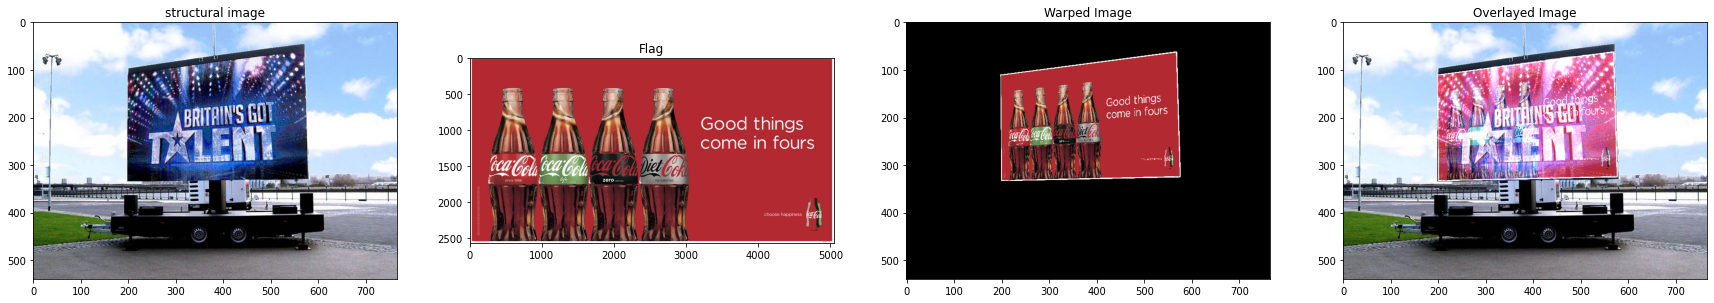

In [4]:
#Question 2
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
#Mouse clicking
k = 0
def mousePoint(event, x,y,flags,params):
    if event == cv.EVENT_LBUTTONDOWN:
        imgPoints.append([x,y,1])

def Homography(imgPoints, flagPoints):
    A = []
    for i in range(4):
        A.append([flagPoints[i][0],flagPoints[i][1],flagPoints[i][2],0,0,0,
        -imgPoints[i][0]*flagPoints[i][0],-imgPoints[i][0]*flagPoints[i][1],-imgPoints[i][0]*flagPoints[i][2]])
        A.append([0,0,0,flagPoints[i][0],flagPoints[i][1],flagPoints[i][2],
        -imgPoints[i][1]*flagPoints[i][0],-imgPoints[i][1]*flagPoints[i][1],-imgPoints[i][1]*flagPoints[i][2]])
    A = np.array(A,dtype = np.float64)
    AAT = A.T @ A
    w, v = np.linalg.eig(AAT)
    H = v[:, np.argmin(w)]
    H = H.reshape((3,3))
    H = H/H[-1,-1]
    return H

img = cv.imread('screen.jpg',cv.IMREAD_ANYCOLOR)
cv.imshow("IMG",img)
imgPoints = []
cv.setMouseCallback("IMG",mousePoint)
k = cv.waitKey(0)
if k ==ord('q'): 
    cv.destroyAllWindows()
imgFlag = cv.imread('cocacola.jpg',cv.IMREAD_ANYCOLOR)
flagheight,flagWidth = imgFlag.shape[0],imgFlag.shape[1]
flagPoints = np.array([[0,0,1],[flagWidth,0,1],[flagWidth,flagheight,1],[0,flagheight,1]])
imgPoints = np.array(imgPoints)
H = Homography(imgPoints,flagPoints)
print('H= ',H)
rows,cols,ch = img.shape
warpedImg = cv.warpPerspective(imgFlag,H,(cols,rows))
overlayImg = cv.add(img, warpedImg)
fig,ax = plt.subplots(1,4,figsize = (30,15))
warpedImg = cv.cvtColor(warpedImg, cv.COLOR_BGR2RGB)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
imgFlag = cv.cvtColor(imgFlag, cv.COLOR_BGR2RGB)
overlayImg = cv.cvtColor(overlayImg, cv.COLOR_BGR2RGB)
ax[0].imshow(img)
ax[0].set_title("structural image")
ax[1].imshow(imgFlag)
ax[1].set_title("Flag")
ax[2].imshow(warpedImg)
ax[2].set_title("Warped Image")
ax[3].imshow(overlayImg)
ax[3].set_title("Overlayed Image")


In this question, first calculate the A matrix and solved it using eigen values.Finally homography matrix is the eigen vector which is correspond to the minimum eigen value. There are image results of the algorithm in the above cell.

---


Question 3
---

Homography matrix of 1 to 5 translation is calculated by multiplying 1 to 2, 2 to 3, 3 to 4, 4 to 5 homography metrices.<br>
im2 = H1@im1<br>
im3 = H2@(H1@im1)<br>
im4 = H3@(H2@(H1@im1))<br>
im5 = H4@(H3@(H2@(H1@im1)))<br>
Then, im5 = H4@H3@H2@H1@im1<br>
This is the way I calculated the homography matrix for image 1 to image 5 transformation. (Implemented algorithm is in the following cells)<br>
In here, the RANSAC algorithm is used to eliminate the fake points given by the SIFT matching.


In [49]:
#Question 3
#SIFT features
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

def siftMatchPoints(img1,img2):
    sift = cv.xfeatures2d.SIFT_create()
    keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50)
    flann = cv.FlannBasedMatcher(index_params,search_params)
    matches = flann.knnMatch(descriptors_1,descriptors_2,k=2)
    pts1 = []
    pts2 = []

    for i,(m,n) in enumerate(matches):
        if m.distance < 0.7*n.distance:
            pts2.append(keypoints_2[m.trainIdx].pt)
            pts1.append(keypoints_1[m.queryIdx].pt)

    pts1 = np.int32(pts1)
    pts2 = np.int32(pts2)
    src = np.concatenate((pts1,np.ones((pts1.shape[0],1))),axis=1)
    dst = np.concatenate((pts2,np.ones((pts2.shape[0],1))),axis=1)
    return src,dst

def RansacHomography(src,dst):

    numOfIn = 0
    inS = []
    inD = []
    for J in range(100):
        #generate 4 random numbers for choose 4 points 
        randInt1,randInt2,randInt3,randInt4 = np.random.randint(0,2000,4)%(src.shape[0])
        while randInt1==randInt2 or randInt2==randInt3 or randInt3==randInt1 or randInt4==randInt1 or randInt3==randInt4 or randInt2==randInt4:
            randInt1,randInt2,randInt3,randInt4 = np.random.randint(0,2000,4)%(src.shape[0])

        src1 = np.array([src[randInt1],src[randInt2],src[randInt3],src[randInt4]])
        dst1 = np.array([dst[randInt1],dst[randInt2],dst[randInt3],dst[randInt4]])
        A = []
        for i in range(src1.shape[0]):
            A.append([src1[i][0],src1[i][1],src1[i][2],0,0,0,-dst1[i][0]*src1[i][0],-dst1[i][0]*src1[i][1],-dst1[i][0]*src1[i][2]])
            A.append([0,0,0,src1[i][0],src1[i][1],src1[i][2],-dst1[i][1]*src1[i][0],-dst1[i][1]*src1[i][1],-dst1[i][1]*src1[i][2]])
        #find H
        A = np.array(A)
        AAT = A.T @ A
        w,v = np.linalg.eig(AAT)
        H = v[:, np.argmin(w)]
        H = H.reshape((3,3))
        H = H/H[-1,-1]
        #find number of inliers
        epsilon = 25
        count = 0
        inlierss = []
        inliersd = []
        for k in range(src.shape[0]):
            x_ = H@src[k,:].reshape(3, 1)
            x_ = x_ [:2].reshape(1, 2)[0]
            x__ = (dst[k,0:2].reshape(1, 2)[0]-x_)

            if  abs(x__[0])< epsilon and abs(x__[1]) < epsilon:

                count += 1
                inlierss.append(src[k,:])
                inliersd.append(dst[k,:])
        
        #select occassion of  highest number of inliers    
        if numOfIn < count:
            numOfIn = count
            inS = inlierss.copy()
            inD = inliersd.copy()
            
    inS = np.array(inS.copy())
    inD = np.array(inD.copy())

    src1 = inS.copy()
    dst1 = inD.copy()
    return src1,dst1

#Calculate H
def CalcH(src1,dst1):
    src1,dst1 = RansacHomography(src1,dst1)
    A = []
    for i in range(src1.shape[0]):
        A.append([src1[i][0],src1[i][1],src1[i][2],0,0,0,-dst1[i][0]*src1[i][0],-dst1[i][0]*src1[i][1],-dst1[i][0]*src1[i][2]])
        A.append([0,0,0,src1[i][0],src1[i][1],src1[i][2],-dst1[i][1]*src1[i][0],-dst1[i][1]*src1[i][1],-dst1[i][1]*src1[i][2]])
    A = np.array(A)
    AAT = A.T @ A
    w,v = np.linalg.eig(AAT)
    H = v[:, np.argmin(w)]
    H = H.reshape((3,3))
    H = H/H[-1,-1]
 
    return H
img1 = cv.imread('img1.ppm')  
img2 = cv.imread('img2.ppm')
img3 = cv.imread('img3.ppm')  
img4 = cv.imread('img4.ppm')
img5 = cv.imread('img5.ppm')
pts1,pts2 = siftMatchPoints(img1,img2)
pts1,pts2 = RansacHomography(pts1,pts2)
H1 = CalcH(pts1,pts2)
pts3,pts4 = siftMatchPoints(img2,img3)
pts3,pts4 = RansacHomography(pts3,pts4)
H2 = CalcH(pts3,pts4)
pts5,pts6 = siftMatchPoints(img3,img4)
pts5,pts6 = RansacHomography(pts5,pts6)
H3 = CalcH(pts5,pts6)
pts7,pts8 = siftMatchPoints(img4,img5)
pts7,pts8 = RansacHomography(pts7,pts8)
H4 = CalcH(pts7,pts8)
H = H4@H3@H2@H1
im1to5 = cv.warpPerspective(img1,H,(img5.shape[1],img5.shape[0]))
im1to5 = cv.cvtColor(im1to5, cv.COLOR_BGR2RGB)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img5 = cv.cvtColor(img5, cv.COLOR_BGR2RGB)

In [50]:
print('H= ',H) 

givenHomographyInDataset = np.array([[6.2544644e-01  , 5.7759174e-02  , 2.2201217e+02],
   [2.2240536e-01 ,  1.1652147e+00 , -2.5605611e+01],
   [4.9212545e-04 , -3.6542424e-05  , 1.0000000e+00]])
print('SSD between calculated H and given homography matrix: ',sum(sum((np.square(H-givenHomographyInDataset)))))

H=  [[ 6.15301852e-01  5.62318060e-02  2.20202799e+02]
 [ 2.17433166e-01  1.13803888e+00 -2.19912839e+01]
 [ 4.83471328e-04 -6.03086868e-05  9.93343713e-01]]
SSD between calculated H and given homography matrix:  16.33809614675612


In the above cell, there is the comparison between homography metrices which is given in the datasheet and calculated by me. The squre sum of differences value between those two homography metrices are nearly 16.

Text(0.5, 1.0, 'Stiched Image')

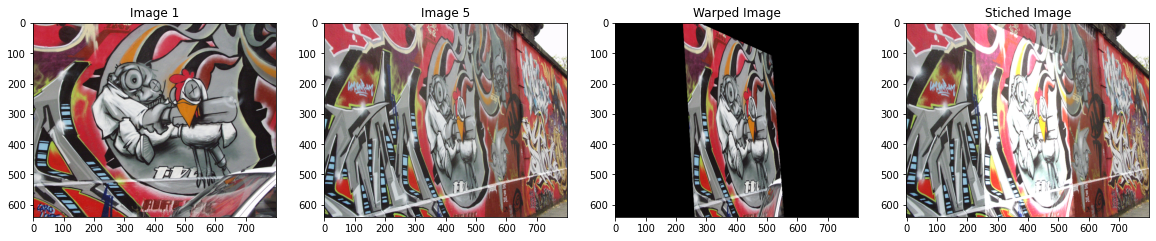

In [51]:
fig,ax = plt.subplots(1,4,figsize = (20,15))
img6 = cv.add(img5,im1to5)
ax[0].imshow(img1)
ax[0].set_title("Image 1")
ax[1].imshow(img5)
ax[1].set_title("Image 5")
ax[2].imshow(im1to5)
ax[2].set_title("Warped Image")
ax[3].imshow(img6)
ax[3].set_title("Stiched Image")

These are the image results of the image 1 to 5 transformation which is implemented by me.